# Airbnb predictive modeling: Word Vectorization

#### ---------------------------------------------------------------------------------------------------------------------

 In the latest installment of this Airbnb series; I analyze the performance of various classification/regression models trained on a small subset of the data features.

## $\Large{\S \textbf{1: } \text{Exploratory Analysis}}$


In [2]:
import pandas as pd

# Read in data for New York City listings
df = pd.read_csv('listings-nyc.csv', low_memory = False)

# Setting display specifications
pd.set_option('display.max_colwidth' , 200)
pd.set_option('display.max_columns' , 6)
pd.set_option('display.max_rows' , 100)

In [3]:
# Examining the data and some relevant metrics
print("AIRBNB DATA: # entries = ", len(df)," # columns = ", len(df.columns))

# Print first few entries for each column, along with number of unique values and null entries
for col in df.columns:
    print(col.upper(), " ... ", " # of null entries = ", df[col].isna().sum(), "...  # of unique entries = ", df[col].nunique())
    print(df[col].head())
    print("______________")
    

AIRBNB DATA: # entries =  50599  # columns =  106
ID  ...   # of null entries =  0 ...  # of unique entries =  50599
0    2595
1    3831
2    5099
3    5121
4    5178
Name: id, dtype: int64
______________
LISTING_URL  ...   # of null entries =  0 ...  # of unique entries =  50599
0    https://www.airbnb.com/rooms/2595
1    https://www.airbnb.com/rooms/3831
2    https://www.airbnb.com/rooms/5099
3    https://www.airbnb.com/rooms/5121
4    https://www.airbnb.com/rooms/5178
Name: listing_url, dtype: object
______________
SCRAPE_ID  ...   # of null entries =  0 ...  # of unique entries =  1
0    20191204162729
1    20191204162729
2    20191204162729
3    20191204162729
4    20191204162729
Name: scrape_id, dtype: int64
______________
LAST_SCRAPED  ...   # of null entries =  0 ...  # of unique entries =  4
0    2019-12-07
1    2019-12-07
2    2019-12-06
3    2019-12-06
4    2019-12-05
Name: last_scraped, dtype: object
______________
NAME  ...   # of null entries =  17 ...  # of unique entrie

HOST_URL  ...   # of null entries =  0 ...  # of unique entries =  38130
0    https://www.airbnb.com/users/show/2845
1    https://www.airbnb.com/users/show/4869
2    https://www.airbnb.com/users/show/7322
3    https://www.airbnb.com/users/show/7356
4    https://www.airbnb.com/users/show/8967
Name: host_url, dtype: object
______________
HOST_NAME  ...   # of null entries =  563 ...  # of unique entries =  11605
0       Jennifer
1    LisaRoxanne
2          Chris
3          Garon
4       Shunichi
Name: host_name, dtype: object
______________
HOST_SINCE  ...   # of null entries =  563 ...  # of unique entries =  3720
0    2008-09-09
1    2008-12-07
2    2009-02-02
3    2009-02-03
4    2009-03-03
Name: host_since, dtype: object
______________
HOST_LOCATION  ...   # of null entries =  714 ...  # of unique entries =  1575
0    New York, New York, United States
1    New York, New York, United States
2    New York, New York, United States
3    New York, New York, United States
4    New York, Ne

LATITUDE  ...   # of null entries =  0 ...  # of unique entries =  19410
0    40.75362
1    40.68514
2    40.74767
3    40.68688
4    40.76489
Name: latitude, dtype: float64
______________
LONGITUDE  ...   # of null entries =  0 ...  # of unique entries =  15186
0   -73.98377
1   -73.95976
2   -73.97500
3   -73.95596
4   -73.98493
Name: longitude, dtype: float64
______________
IS_LOCATION_EXACT  ...   # of null entries =  0 ...  # of unique entries =  2
0    f
1    t
2    f
3    f
4    t
Name: is_location_exact, dtype: object
______________
PROPERTY_TYPE  ...   # of null entries =  0 ...  # of unique entries =  35
0      Apartment
1    Guest suite
2      Apartment
3      Apartment
4      Apartment
Name: property_type, dtype: object
______________
ROOM_TYPE  ...   # of null entries =  0 ...  # of unique entries =  4
0    Entire home/apt
1    Entire home/apt
2    Entire home/apt
3       Private room
4       Private room
Name: room_type, dtype: object
______________
ACCOMMODATES  ...   # 

REVIEW_SCORES_CLEANLINESS  ...   # of null entries =  11184 ...  # of unique entries =  9
0    9.0
1    9.0
2    9.0
3    8.0
4    7.0
Name: review_scores_cleanliness, dtype: float64
______________
REVIEW_SCORES_CHECKIN  ...   # of null entries =  11214 ...  # of unique entries =  9
0    10.0
1    10.0
2    10.0
3    10.0
4     9.0
Name: review_scores_checkin, dtype: float64
______________
REVIEW_SCORES_COMMUNICATION  ...   # of null entries =  11195 ...  # of unique entries =  9
0    10.0
1     9.0
2    10.0
3    10.0
4     9.0
Name: review_scores_communication, dtype: float64
______________
REVIEW_SCORES_LOCATION  ...   # of null entries =  11218 ...  # of unique entries =  8
0    10.0
1    10.0
2    10.0
3     9.0
4    10.0
Name: review_scores_location, dtype: float64
______________
REVIEW_SCORES_VALUE  ...   # of null entries =  11217 ...  # of unique entries =  9
0    9.0
1    9.0
2    9.0
3    9.0
4    8.0
Name: review_scores_value, dtype: float64
______________
REQUIRES_LICENSE 

$ \\ $

You can see the columns containing large character strings are `name`, `summary`, `description`, `space`, `neighborhood_overview`, `notes`, `transit`, `access`, `interaction` and  `house_rules` among others.

$\\ $
If we seek to predict pricing we must first make our data readable by reformatting certain columns; converting `'$1,000.00'` to  `1000` for example.

$\\ $


## $\Large{\S \textbf{2: } \text{Data Cleaning}}$



$\\ $

°Make all columns containing price values readable as integers by removing `$` and `,`. 

°Aggregate the `price` and `cleaning_fee` columns into a total cost for 1,2, and 5 day stays

°Take the logorithm of the `price` and `total_*` columns, we see later why this is needed.


$\\ $


In [4]:
# Each column here must be cleaned
cost_columns = ['price', 'weekly_price','monthly_price', 'security_deposit', 'cleaning_fee','extra_people']

# Convert strings to integers
for col in cost_columns:
    df[col] = df[col].fillna(0.0)
    df[col] = df[col].astype(str)
    df[col] = df[col].str.replace('$','')
    df[col] = df[col].str.replace(',','')
    df[col] = df[col].astype(float)
    df[col] = df[col].astype(int)

# Calculating total cost for 1, 2, and 5 day stays by including the cleaning fee 
df['total_1day'] = df.apply(lambda x: x['price']+x['cleaning_fee'], axis = 1)
df['total_2day'] = df.apply(lambda x: x['price']+ 0.5 * x['cleaning_fee'], axis = 1)
df['total_5day'] = df.apply(lambda x: x['price']+ 0.2 * x['cleaning_fee'], axis = 1)


import numpy as np
# Taking the logaritm of both both price and total cost
df['logprice'] = df.apply(lambda x: np.log(x['price']) if x['price']!=0 else 0, axis=1)
df['logtotal'] = df.apply(lambda x: np.log(x['total_5day']) if x['total_5day'] !=0 else 0, axis=1)

#### All other Columns:

`integer_columns ` contains `int` values with `dtype` `str` 

`float_columns` contains `float` values with `dtype` `str` 

`category_columns` contain category columns, which we convert to `int` using `sklearn`'s `OrdinalEncoder`

and `boolean_columns` contain `t` or `f` which we change to `1` and `0`, respectively


In [5]:
integer_columns = ['accommodates','bedrooms','beds','guests_included' ,'host_listings_count','host_total_listings_count']   
float_columns = ['bathrooms','number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','reviews_per_month']   
category_columns = ['property_type','room_type', 'bed_type','neighbourhood_cleansed','neighbourhood_group_cleansed','host_neighbourhood', 'host_is_superhost', 'host_has_profile_pic','host_identity_verified']   


# Cleaning each column accordingly 
for col in integer_columns:
    df[col] = df[col].fillna(0.0)
    df[col] = df[col].astype(float)
    df[col] = df[col].astype(int)
    
# Change datatype of each review column
for col in float_columns:
    df[col] = df[col].fillna(0)
    df[col] = df[col].astype(int)
    
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
# Assigning an integer to each category and changin
df[category_columns] = df[category_columns].fillna(0)
df[category_columns] = df[category_columns].astype(str)
enc.fit(df[category_columns])

df[category_columns] = enc.transform(df[category_columns])

## $\Large{\S \textbf{3: }\text{Visual Analysis}}$

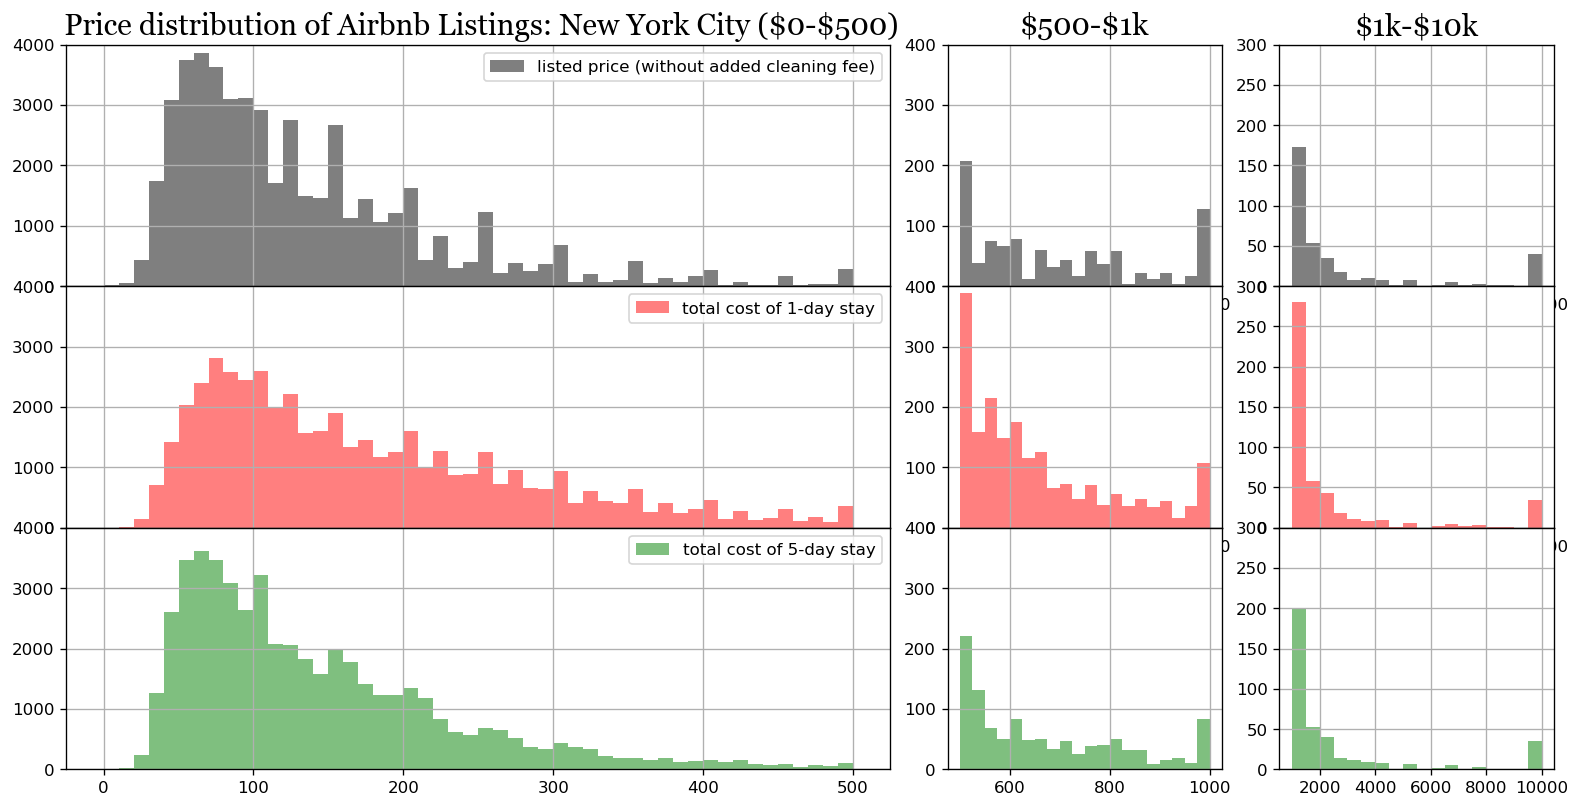

In [13]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec as GS

# Setting plot specifications using GridSpec
gs = GS(nrows=3, ncols=3, width_ratios = [3,1,1])
gs.update(hspace=0, wspace=0.125)
plt.figure(figsize=(16,8), dpi = 120)

# Keeping the lower ranges seperate, to avoid scaling-out the high end of the spectrum
ax0 = [plt.subplot(gs[i,0]) for i in range(3)]
ax1 = [plt.subplot(gs[i,1]) for i in range(3)]
ax2 = [plt.subplot(gs[i,2]) for i in range(3)]
axs = [ax0,ax1,ax2]

lr = lambda x: (0,500) if x==ax0 else (500,1000) if x==ax1 else (1000,10000)
lt = lambda x: " Price distribution of Airbnb Listings: New York City (\\$0-\\$500)" if x==ax0 else "\\$500-\\$1k" if x==ax1 else "\\$1k-\\$10k"
lb = lambda x: 50 if x==ax0 else 20 if x==ax1 else 18

for ax in axs:
    ax[0].set_title(lt(ax), fontname = "Georgia", fontsize = '18.0')
    ax[0].hist(df['price'], color = 'k', bins = lb(ax), range = lr(ax), alpha = 0.5, label = 'listed price (without added cleaning fee)')
    ax[1].hist(df['total_1day'], color = 'r', bins = lb(ax), range = lr(ax), alpha = 0.5, label = 'total cost of 1-day stay')
    ax[2].hist(df['total_5day'], color = 'g', bins = lb(ax), range = lr(ax), alpha = 0.5, label = 'total cost of 5-day stay')
    for ax_ in ax:
        if ax==ax0:
            ax_.legend()
            ax_.set_ylim(0,4000)
        elif ax==ax1:
            ax_.set_ylim(0,400)
        else:
            ax_.set_ylim(0,300)
        ax_.grid(True)
        
plt.show()


$\text{When predicting a continuous quantity, one might use a regression model on correlating features.} \\ $
$\\ $

$\text{But in this case, many different qualities interact together to predict price in a very nonlinear way.} \\ $
$\text{The following figure should convince you of this:}$

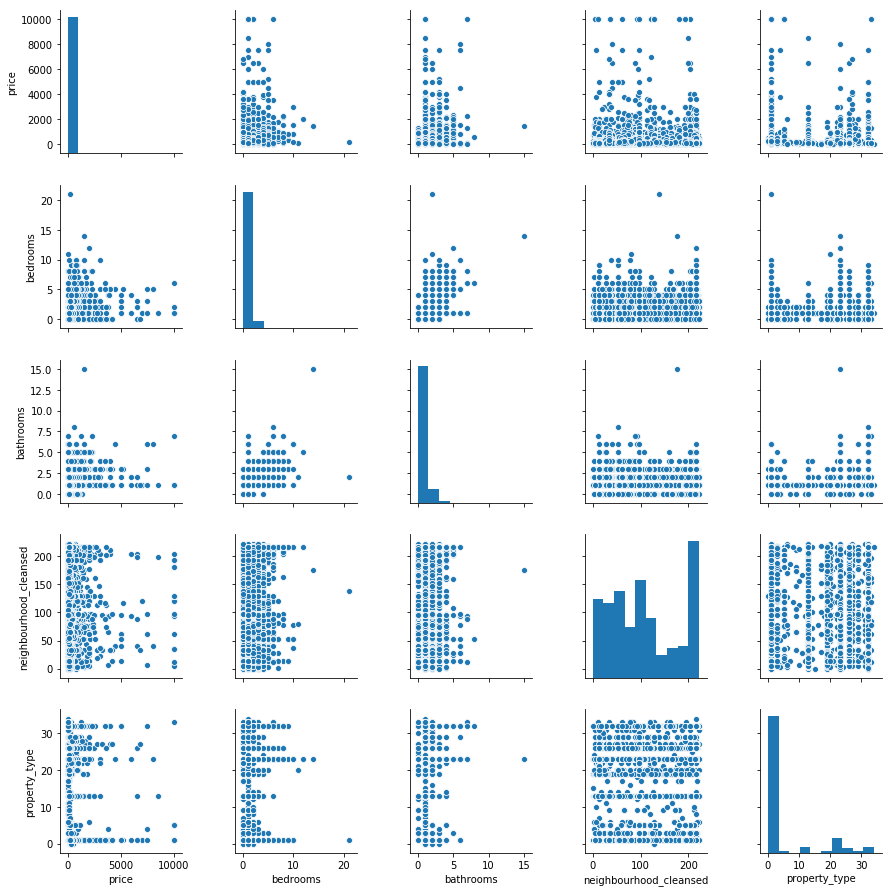

In [7]:
import seaborn as sns

sns.pairplot(df[['price', 'bedrooms', 'bathrooms', 'neighbourhood_cleansed', 'property_type']])
plt.tight_layout()

$\textbf{Instead}$, we can turn this into a classification problem by labelling our samples according to their range of price. The following chain of if/elif/else statements as an example:

```
if x<3:        #  = ~20
    return 0
elif x<3.5:    #  = ~30
    return 1
elif x<4.0:    #  = ~50
    return 2
elif x<4.5:    #  = ~100
    return 3
elif x<5.0:    #  = ~150
    return 4 
elif x<5.5:    #  = ~250
    return 5
elif x<6.0:    #  = ~400
    return 6
elif x<6.5:    #  = ~650     
    return 7
elif x<7.0:    #  = ~1100
    return 8
else:
    return 9
 ```

$\textbf{Using} $ this particular labelling criteria, we see our distribution closely resembles a normal distribution:

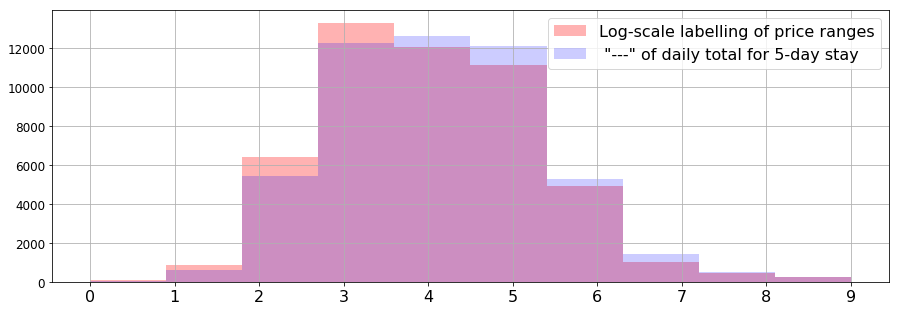

In [8]:

# Create new columns applying the labelling funciton outlined above:
df['logprice_label'] = df['logprice'].apply(lambda x: 0 if x<3 else 1 if x<3.5 else 2 if x<4.0 else 3 if x<4.5 else 4 if x<5.0 else 5 if x<5.5 else 6 if x<6.0 else 7 if x<6.5 else 8 if x<7.0 else 9).astype(int)
df['logtotal_label'] = df['logtotal'].apply(lambda x: 0 if x<3 else 1 if x<3.5 else 2 if x<4.0 else 3 if x<4.5 else 4 if x<5.0 else 5 if x<5.5 else 6 if x<6.0 else 7 if x<6.5 else 8 if x<7.0 else 9).astype(int)

plt.figure(figsize = (15,5))

plt.xticks(list(range(0,10)), fontsize='16')
plt.yticks(list(range(0,16000,2000)), fontsize='12')
plt.hist(df['logprice_label'], color = 'r', alpha=0.3, label='Log-scale labelling of price ranges')
plt.hist(df['logtotal_label'], color = 'b', alpha=0.2, label=' "---" of daily total for 5-day stay')

plt.legend(fontsize='16')
plt.grid(True)
plt.show()

##  $\Large{\S 4.0 \textbf{: Model Testing}}$


#### $\textit{Comparing models}$

$\text{We can compare the performance of both classification and regression algorithms}$

$\text{Then, let's further compare both performances across different models.}$

In [9]:
# PARTITION OUR TRAINING AND VALIDATION SETS
from sklearn.model_selection import train_test_split

# K NEAREST NEIGHBOR MODELS
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

# DECISION TREE MODELS
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

# Useful for plotting subplots
from matplotlib.gridspec import GridSpec as GS

# Metric for scoring the performance of each model
from sklearn.metrics import r2_score, accuracy_score

$\text{I've writen the following function to save on time and avoid writing repetitive code :}$

In [10]:
def compare(Model, algorithm, train_data, train_labels, test_data, test_labels, k):
    # Chosing the model based on input
    if Model=='KNeighbors':
        if algorithm == 'Classifier':
            model = KNeighborsClassifier(n_neighbors=k)
        else:
            model = KNeighborsRegressor(n_neighbors=k)
    elif algorithm =='Classifier':
        model = DecisionTreeClassifier(max_depth=k)
    else:
         model = DecisionTreeRegressor(max_depth=k)
    model.fit(train_data, train_labels)
    predictions = model.predict(test_data)
    return predictions, test_labels, Model, algorithm, k
    
features = ['property_type','room_type','beds','bedrooms','accommodates',\
                     'neighbourhood_cleansed',
                     'review_scores_value',\
                     'number_of_reviews','host_is_superhost',\
                     'reviews_per_month']

X = np.asarray(df[features])
y1 = np.asarray(df['logtotal_label'])
y2 = np.asarray(df['logtotal'])

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size = 0.001, random_state = 1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, test_size = 0.001, random_state = 1)

col = [['KNeighbors','Classifier',X_train1,y_train1,X_test1,y_test1,5],['KNeighbors','Regressor',X_train2,y_train2,X_test2,y_test2,5],['DecisionTree','Classifier',X_train1,y_train1,X_test1,y_test1,10],['DecisionTree','Regressor',X_train2,y_train2,X_test2,y_test2,10]]

$\textbf{Next}$, we can plot our `predicted` values versus our `test_labels` for all our models:

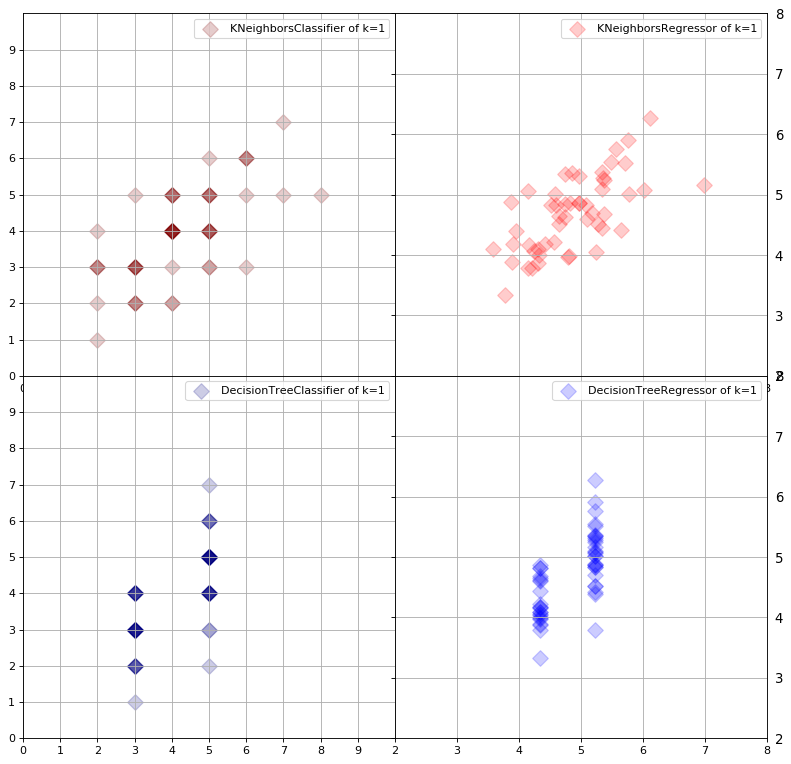

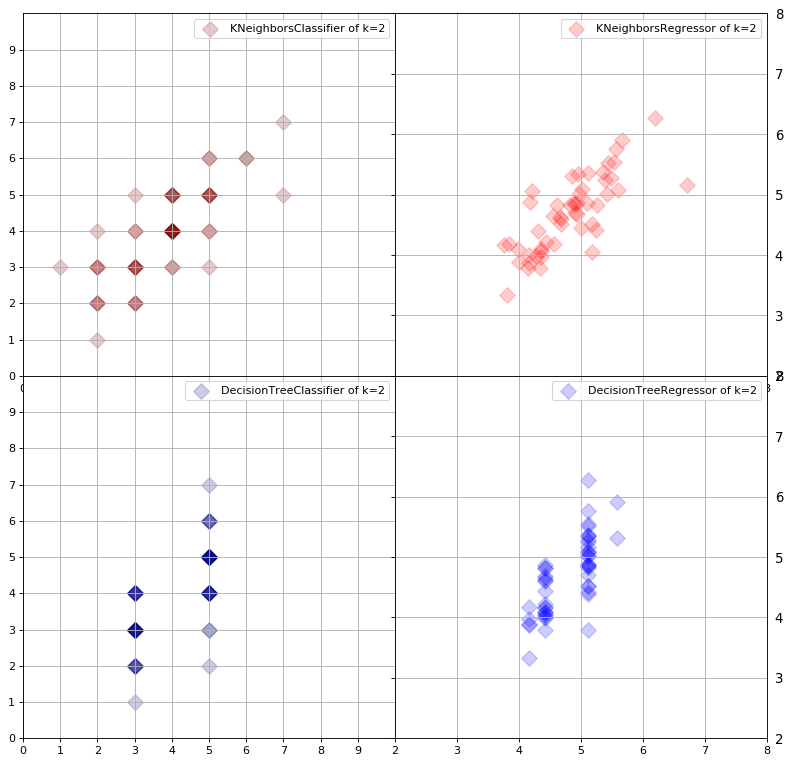

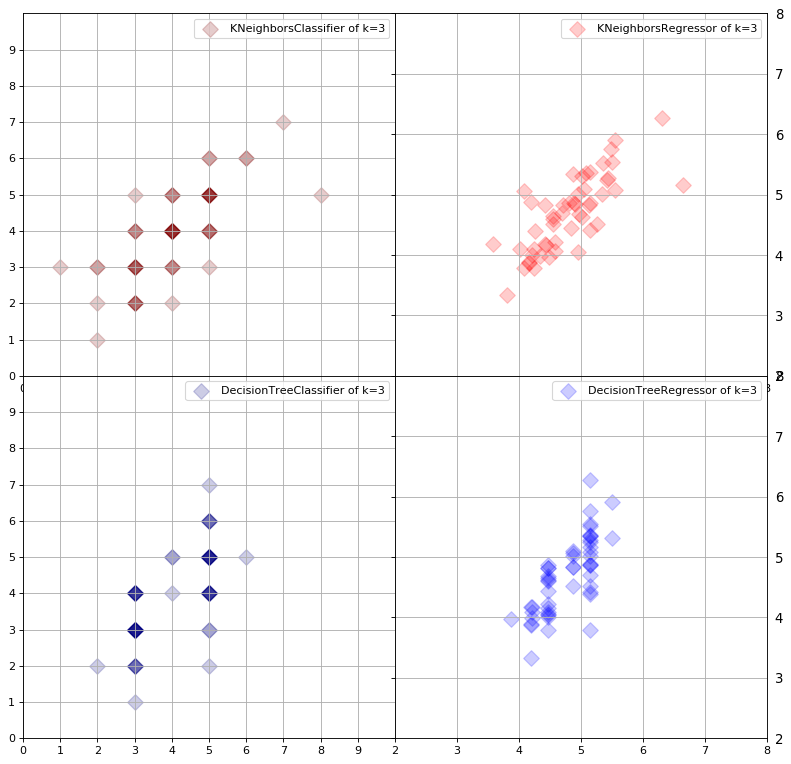

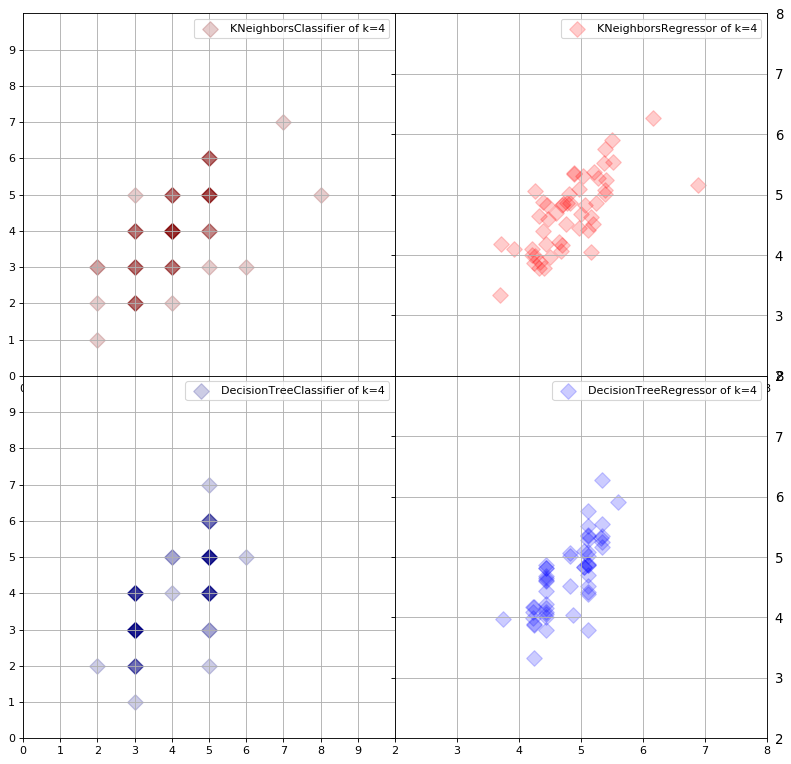

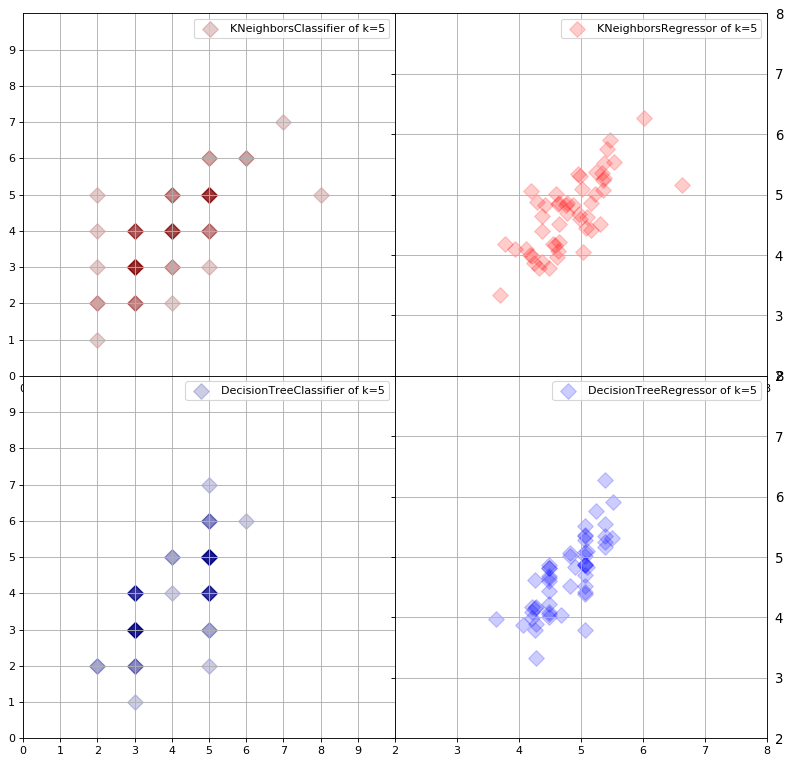

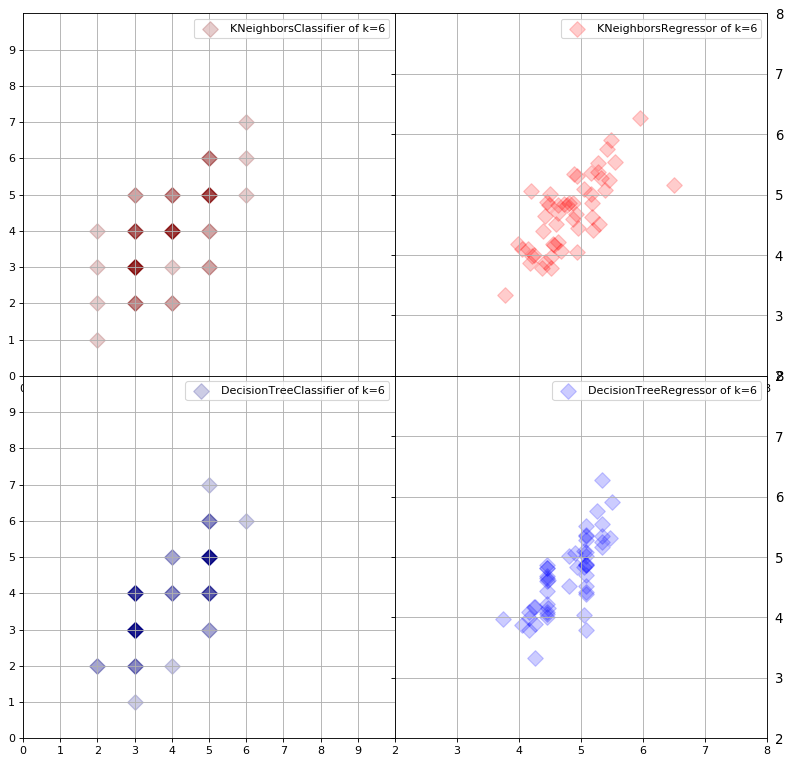

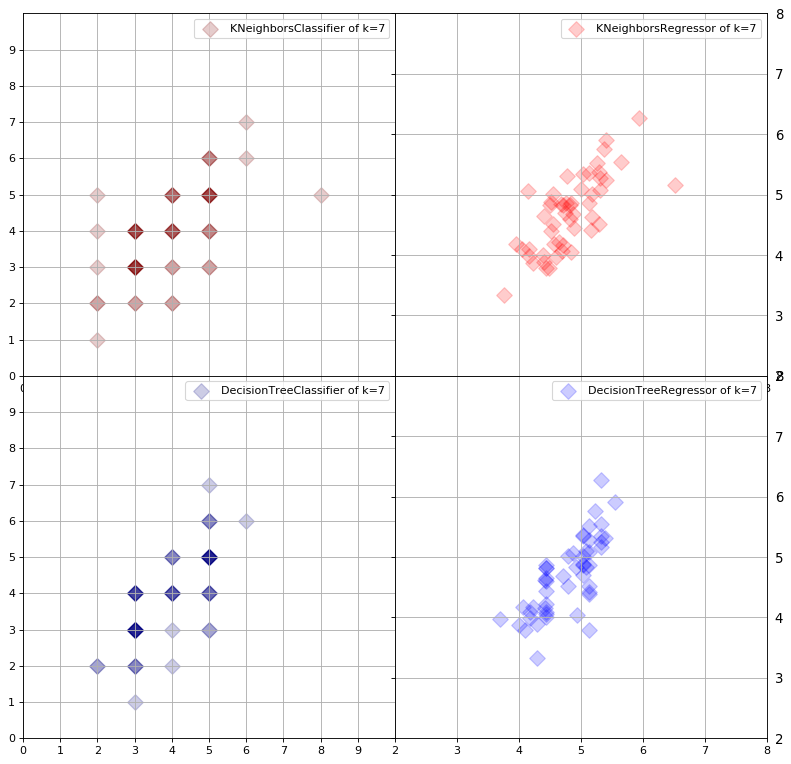

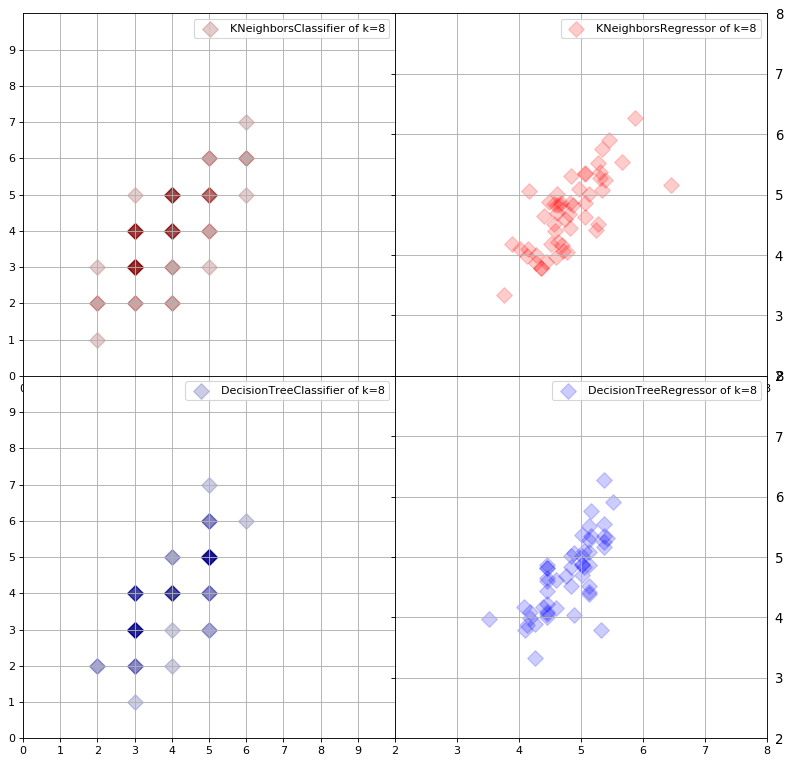

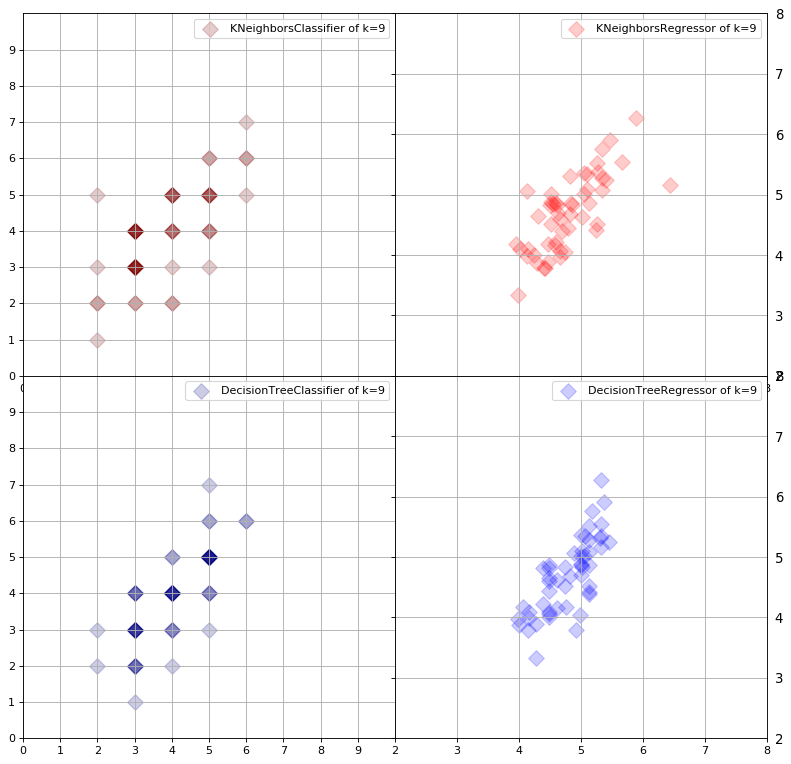

In [11]:
def plot(ax,x,y,m,a,k,i):
    clist=['maroon','r','navy','b']
    ax.scatter(x,y,label=m+a+" of k="+str(k), marker = 'D', color = clist[i], s = 100, alpha=0.2)
    ax.legend(fontsize='12')
    ax.set_xticks(range(0,10))
    ax.set_yticks(range(0,10))
    if a=='Regressor':
        ax.tick_params(axis='y',labelleft=False,labelright=True, labelsize=12)
        ax.set_xlim(2,8)
        ax.set_ylim(2,8)
    else:
        ax.set_xlim(0,10)
        ax.set_ylim(0,10)
    ax.grid(True)
    ax.legend()
    if i==3:
        plt.show()

for ki in range(1,10):
    fig = plt.figure(figsize=(12,12), dpi=80)
    gs = GS(nrows=2, ncols=2, figure=fig)
    gs.update(hspace=0.0,wspace=0.0)
    ax = [plt.subplot(gs[i]) for i in range(4)]
    for i in range(4):
        x,y,m,a,k = compare(col[i][0],col[i][1],col[i][2],col[i][3],col[i][4],col[i][5],ki)
        plot(ax[i],x,y,m,a,k,i)


$\textbf{Finally,}$ our various models' performance as a function of their `max_depth` and `n_neighbors` for the respective Tree and Neighbor algorithms.

The `r2_score`, is used to gauge the accuracy of our regression models, and `accuracy_score` is used in the classification cases:

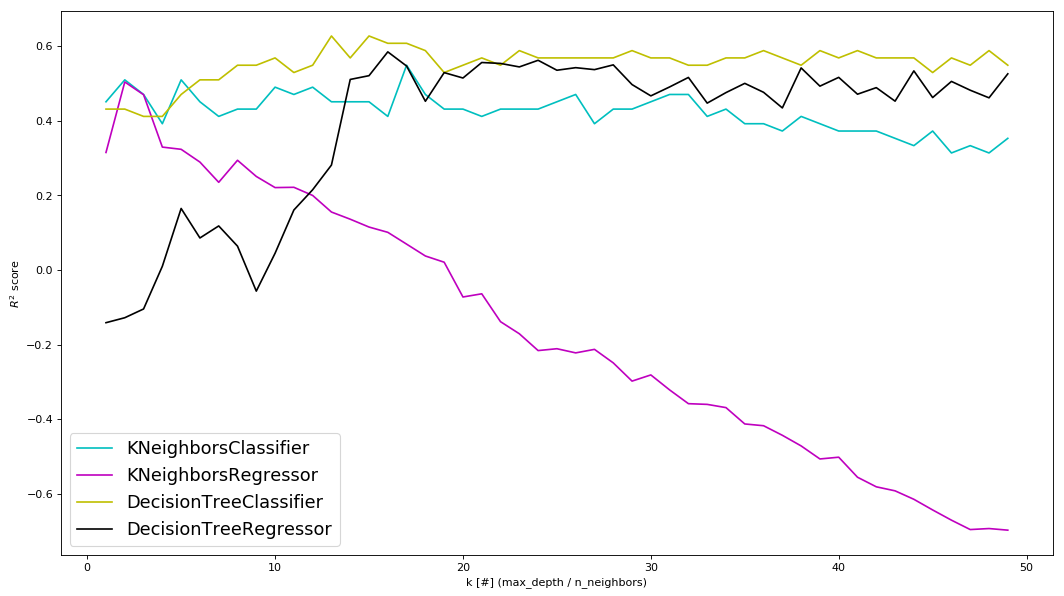

In [12]:
plt.figure(figsize=(16,9), dpi=80)
for i in range(4):
    score_list = []
    clist=['c','m','y','k']
    for ki in range(1,50):
        x,y,m,a,k = compare(col[i][0],col[i][1],col[i][2],col[i][3],col[i][4],col[i][5],ki)
        if a=='Classifier':
            score_list.append(accuracy_score(x,y))
        else:
            score_list.append(r2_score(x,y))
    plt.plot(list(range(1,50)),score_list, color=clist[i],label=m+a)
plt.xlabel("k [#] (max_depth / n_neighbors)")
plt.ylabel("$R^2$ score")
plt.legend(fontsize='16')
plt.show()

#### $\Large{\textit{Conclusion}}$

Out of all our tested cases, the most accurate predictive model for listing price is a `DecisionTreeClassifier` with `max_depth > 25`


Is this the best score achievable? Most likely not. I've tried many differest combinations of features to train DecisionTreeModels on and found great success with the following:
```
features = ['property_type','room_type','beds','bedrooms','accommodates',\
                     'neighbourhood_cleansed',
                     'review_scores_value',\
                     'number_of_reviews','host_is_superhost',\
                     'reviews_per_month']

```

With more time, I hope to add more features to this list and better the performance. My initial attempts using the maximum number of features possible proved unsuccesful, so I adopted a more careful selection process.

In the next installment of this Airbnb series, expect a pipeline of models which group listings by various features, then perform regression using the samples lie in the intersection of all groups.